In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dates = []
prices = []
def get_data(file):
    with open(file, 'r') as csvfile:
        csvFR = csv.reader(csvfile)
        next(csvFR)
        for row in csvFR:
            dates.append(int(row[0].split('-')[2]))
            prices.append(float(row[1]))
    return

In [3]:
get_data('AAPL.csv')

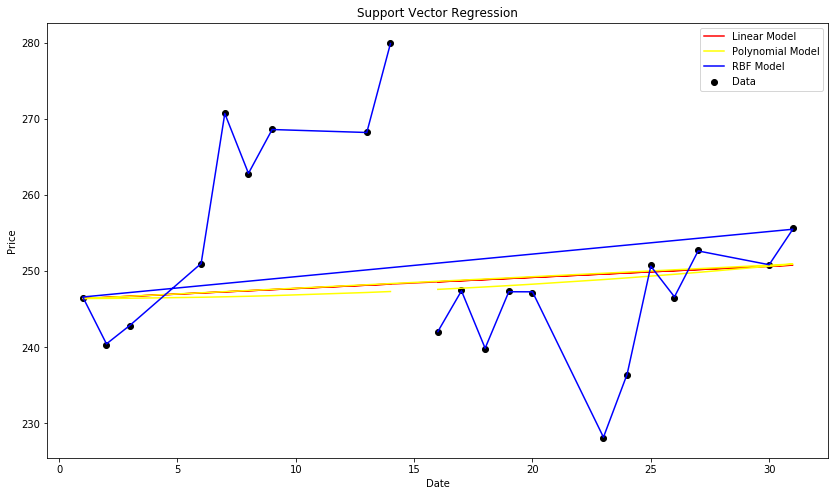

In [4]:
dates = np.reshape(dates,(len(dates), 1))
svr_linear = SVR(kernel = 'linear', C= 100)
svr_polynomial = SVR(kernel = 'poly', C = 1000, degree = 2)
svr_rbf = SVR(kernel = 'rbf', C=100, gamma = 'auto')
svr_linear.fit(dates, prices)
svr_polynomial.fit(dates, prices)
svr_rbf.fit(dates, prices)
    
plt.rcParams['figure.figsize']=(14,8)
plt.scatter(dates, prices, color = 'black', label= 'Data')
plt.plot(dates, svr_linear.predict(dates), color = 'red', label = 'Linear Model')
plt.plot(dates, svr_polynomial.predict(dates), color = 'yellow', label = 'Polynomial Model')
plt.plot(dates, svr_rbf.predict(dates), color = 'blue', label = 'RBF Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [5]:
dates.shape

(21, 1)

In [8]:
svr_rbf.predict(np.reshape([26], ((1,1))))

array([246.62000085])